## Домашнее задание по блоку 25.03.2021. Базовые понятия статистики
### Тихонова Инна

**Обязательная часть**

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

## Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

In [1]:
import pandas as pd
import numpy as np

### 1.1. Загрузка данных

Загрузим данные в датафрейм сразу с корректными названиями колонок:

In [2]:
column_names = ['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
                           'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membranes', 'capillary_refill_time',
                           'pain', 'peristalsis', 'abdominal_distension', 'nasogastric_tube', 'nasogastric_reflux',
                           'nasogastric_reflux_PH', 'rectal_examination_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
                           'abdomin_appearance', 'abdomce_total_protein', 'outcome', 'surgical_lesion', 'first_type_of_lesion',
                           'second_type_of_lesion', 'third_type_of_lesion', 'fourth_type_of_lesion', 'cp_data']

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv',
                names = column_names, header = None, na_values = '?')
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,...,total_protein,abdomin_appearance,abdomce_total_protein,outcome,surgical_lesion,first_type_of_lesion,second_type_of_lesion,third_type_of_lesion,fourth_type_of_lesion,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,8.4,NaN,NaN,2.0,2,11300,0,0,2,NaN
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,85.0,2.0,2.0,3.0,2,2208,0,0,2,NaN
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,6.7,NaN,NaN,1.0,2,0,0,0,1,NaN
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,7.2,3.0,5.3,2.0,1,2208,0,0,1,NaN
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,7.4,NaN,NaN,2.0,2,4300,0,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,65.0,NaN,NaN,3.0,2,3205,0,0,2,NaN
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,NaN,3.0,3.3,3.0,1,2208,0,0,1,NaN
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,6.8,NaN,NaN,2.0,1,3205,0,0,2,NaN
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,6.0,3.0,3.4,1.0,1,2208,0,0,1,NaN


Выведем общую информацию:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   surgery                   299 non-null    float64
 1   age                       300 non-null    int64  
 2   hospital_number           300 non-null    int64  
 3   rectal_temp               240 non-null    float64
 4   pulse                     276 non-null    float64
 5   respiratory_rate          242 non-null    float64
 6   temp_of_extremities       244 non-null    float64
 7   peripheral_pulse          231 non-null    float64
 8   mucous_membranes          253 non-null    float64
 9   capillary_refill_time     268 non-null    float64
 10  pain                      245 non-null    float64
 11  peristalsis               256 non-null    float64
 12  abdominal_distension      244 non-null    float64
 13  nasogastric_tube          196 non-null    float64
 14  nasogastri

Числовые столбцы получили корректные пропуски и корректный тип данных. Также видим, что в столбце `cp_data` только нулевые значения, удалим его:

In [5]:
df = df.drop('cp_data', axis=1)
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,...,packed_cell_volume,total_protein,abdomin_appearance,abdomce_total_protein,outcome,surgical_lesion,first_type_of_lesion,second_type_of_lesion,third_type_of_lesion,fourth_type_of_lesion
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


### 1.2. Расчет базовых метрик

Выберем несколько столбцов для более детального изучения:

In [6]:
detail = df[['surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 
             'peristalsis', 'outcome']].copy()

Вот что известно об этих столбцах из описания датасета:

1. surgery:
    - 1 = Была операция
    - 2 = Лечение без хирургического вмешательства


2. age:
    - 1 = Взрослая лощадь
    - 9 = Молодая лошадь (менее 6 месяцев)


3. rectal temperature:
    - Измеряется в градусах Цельсия
    - Повышение темературы может говорить об инфекции
    - Температура может понижаться, когда лошадь впадает в шок
    - Нормальная температура = 37.8
    - Обычно по мере прогрессирования проблемы температура меняется характерным образом: например, может сначала быть нормальной, а затем повышаться из-за поражения, затем снова понижаться, проходя обратно через нормальный диапазон, когда лошадь впадает в шок


4. pulse:
    - Количество сердечных сокращений в минуту
    - Нормальный пульс = 30-40 сердечных сокращений для взрослых лошадей
    - Редко бывает, чтобы пульс был ниже нормального, хотя спортивные лошади могут иметь пульс 20-25
    - У животных с болезненными поражениями или страдающих от шока кровообращения может наблюдаться повышенная частота сердечных сокращений


5. respiratory rate:
    - Нормальная частота дыхания = 8-10
    - Полезность параметра вызывает вопросы


6. temperature of extremities:
    - Субъективный показатель периферического кровообращения
    - Возможные значения:
        - 1 = Нормальная
        - 2 = Теплая
        - 3 = Холодная
        - 4 = Очень холодная
    - Переход от холодной температуры к очень холодной является показателем шока
    - Высокая температура конечностей может коррелировать с высокой общей температурой


7. peripheral pulse:
    - Субъективный показатель
    - Возможные значения:
       - 1 = Нормальный
       - 2 = Повышенный
       - 3 = Пониженный
       - 4 = Отсутствует
    - Нормальный и повышенный периферический пульс указывают на адекватное кровообращение, в то время как пониженный или отсутствующий указывают на плохое кровоснабжение


8. peristalsis:
    - Признак активности в кишечнике лошади. По мере того, как кишечник становится более раздутым или лошадь становится более токсичной, активность снижается
    - Возможные значения:
       - 1 = Повышенная
       - 2 = Нормальная
       - 3 = Пониженная
       - 4 = Отсутствует


9. outcome:
    - Результат заболевания
    - Возможные значения:
       - 1 = Лошадь выжила
       - 2 = Лошадь умерла
       - 3 = Усыпили

Рассчитаем базовые метрики сначала с помощью метода `describe()`:

In [7]:
detail.describe().T

,count,mean,std,min,25%,50%,75%,max
surgery,299.0,1.397993,0.490305,1.0,1.0,1.0,2.0,2.0
age,300.0,1.640000,2.173972,1.0,1.0,1.0,1.0,9.0
rectal_temp,240.0,38.167917,0.732289,35.4,37.8,38.2,38.5,40.8
pulse,276.0,71.913043,28.630557,30.0,48.0,64.0,88.0,184.0
respiratory_rate,242.0,30.417355,17.642231,8.0,18.5,24.5,36.0,96.0
temp_of_extremities,244.0,2.348361,1.045054,1.0,1.0,3.0,3.0,4.0
peripheral_pulse,231.0,2.017316,1.042428,1.0,1.0,2.0,3.0,4.0
peristalsis,256.0,2.917969,0.976744,1.0,3.0,3.0,4.0,4.0
outcome,299.0,1.551839,0.737187,1.0,1.0,1.0,2.0,3.0


В этих значениях нет моды - т.е. самого частого значения. Исправим это: посчитаем все метрики с учетом моды в виде таблички.

In [8]:
def get_basics():

    basics = []
    b_columns = ['column', 'count', 'mean', 'median', 'mode', 'min', 'max', 'var', 'std']

    for col in detail.columns:
        basics.append([col, 
                       detail[col].count(), 
                       np.mean(detail[col]), 
                       detail[col].median(), 
                       detail[col].mode()[0], 
                       detail[col].min(),
                       detail[col].max(),
                       round(np.var(detail[col]), 2),
                       round(np.std(detail[col]), 2)])

    return pd.DataFrame(data = basics, columns = b_columns).set_index('column')
    
    
basics = get_basics()
basics

,count,mean,median,mode,min,max,var,std
column,,,,,,,,
surgery,299,1.397993,1.0,1.0,1.0,2.0,0.24,0.49
age,300,1.640000,1.0,1.0,1.0,9.0,4.71,2.17
rectal_temp,240,38.167917,38.2,38.0,35.4,40.8,0.53,0.73
pulse,276,71.913043,64.0,48.0,30.0,184.0,816.74,28.58
respiratory_rate,242,30.417355,24.5,20.0,8.0,96.0,309.96,17.61
temp_of_extremities,244,2.348361,3.0,3.0,1.0,4.0,1.09,1.04
peripheral_pulse,231,2.017316,2.0,1.0,1.0,4.0,1.08,1.04
peristalsis,256,2.917969,3.0,3.0,1.0,4.0,0.95,0.97
outcome,299,1.551839,1.0,1.0,1.0,3.0,0.54,0.74


Все базовые метрики рассчитаны. Рассмотрим их внимательнее.

 - **`surgery`**: 
 
1 означает проведение операции, 2 - лечение без вмешательства. Минимальное и максимальное значение говорят, что выбросов нет. Также видим, что по большей части в датасете хранятся данные о лошадях, которым проводили операцию (медиана и мода = 1).

 - **`age`**: 

1 означает взрослую лошадь, 9 - молодую. Видно, что по большей части в датасете представлены именно взрослые лошади (медиана и мода = 1).

 - **`rectal_temp`**: 
 
Измеряется в градусах Цельсия, нормальная температура = 37,8 градусов. При этом и медиана, и мода, и среднее значения находятся в районе 38-38,2 градусов, что говорит о том, что у лошадей из датасета была повышенная температура.  

 - **`pulse`**:
 
Нормальный пульс = 30-40 сердечных сокращений в минуту. Видим, что почти все метрики в датасете сильно и даже очень сильно завышены по сравнению с нормальным пульсом:
 - самое частое значение пульса = 48
 - медианное значение = 64
 - среднее = 72
 - максимальное значение составляет и вовсе 184 удара в минуту


 - **`respiratory_rate`**:
  
Нормальная частота дыхания = 8-10. В датасете видим примерно такую же картину, как и для параметра `pulse`: все метрики завышены по сравнению с обычным показателем частоты дыхания:

 - самое частое значение частоты дыхания = 20
 - медианное значение = 24
 - среднее = 30
 - максимальное значение составляет 96

 - **`temp_of_extremities`**:
 
Нормальный показатель температуры = 1. Хотя данный параметр является категориальным, его значения пронумерованы, и мы можем сформировать некоторые выводы на основании рассчитанных метрик. Например, медиана и мода = 3, а значит, чаще всего была замерялась низкая температура.

 - **`peripheral_pulse`**:
 
Нормальный показатель пульса = 1. Хотя данный параметр является категориальным, его значения пронумерованы, и мы можем сформировать некоторые выводы на основании рассчитанных метрик. Например, мода = 1, значит чаще всего замерялся нормальный пульс.

 - **`peristalsis`**:
 
Нормальный показатель активности кишечника = 2. Хотя данный параметр является категориальным, его значения пронумерованы, и мы можем сформировать некоторые выводы на основании рассчитанных метрик. Например, мода и медиана = 3, а значит, чаще всего замерялась пониженная перистальтика кишечника.

 - **`outcome`**:
 
Желательный показатель = 1. Видно, что по большей части лошади выздоравливали в результате лечения (мода и медиана = 1).

Общий вывод по данным метрикам: по большей части в датасете представлены именно больные лошади с нетипичными для здоровых лошадей показателями. При этом по большей части в результате лечения больные лошади выздоравливали.

**Задание 2. Работа с выбросами**

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

In [9]:
for col in ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'peristalsis', 'outcome']:
    print(detail[col].value_counts())

1.0    180
2.0    119
Name: surgery, dtype: int64
1    276
9     24
Name: age, dtype: int64
3.0    109
1.0     78
2.0     30
4.0     27
Name: temp_of_extremities, dtype: int64
1.0    115
3.0    103
4.0      8
2.0      5
Name: peripheral_pulse, dtype: int64
3.0    128
4.0     73
1.0     39
2.0     16
Name: peristalsis, dtype: int64
1.0    178
2.0     77
3.0     44
Name: outcome, dtype: int64


В категориальных столбцах выбросов нет. Выведем значения, выходящие за "норму" в числовых столбцах:

In [10]:
for col in ['rectal_temp', 'pulse', 'respiratory_rate']:
    
    q1 = detail[col].quantile(0.25)
    q3 = detail[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)
    outliers = detail[(detail[col] < lower_bound) | (detail[col] > upper_bound)][col]
    print(outliers)
    

20     39.9
44     35.4
54     40.3
75     39.7
80     36.4
91     40.3
99     39.6
118    36.5
141    36.0
238    36.1
251    36.6
259    40.8
281    40.0
298    36.5
Name: rectal_temp, dtype: float64
3      164.0
41     150.0
55     160.0
255    184.0
275    150.0
Name: pulse, dtype: float64
3      84.0
39     96.0
41     72.0
82     80.0
84     80.0
103    68.0
106    96.0
120    66.0
125    68.0
186    90.0
208    80.0
229    70.0
244    88.0
255    84.0
265    68.0
269    90.0
295    70.0
Name: respiratory_rate, dtype: float64


В этих столбцах выбросы есть. Посмотрим на графики:

<AxesSubplot:>

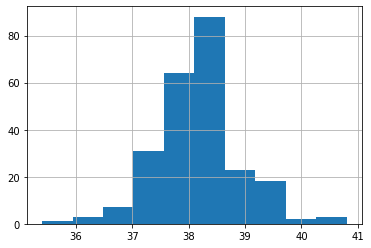

In [11]:
detail['rectal_temp'].hist()

<AxesSubplot:>

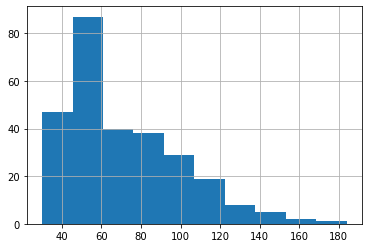

In [12]:
detail['pulse'].hist()

<AxesSubplot:>

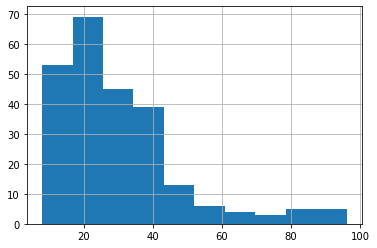

In [13]:
detail['respiratory_rate'].hist(bins=10)

Графики можно назвать "нормальными" - есть всплеск посередине и равномерно (т.е. без скачков) понижающееся количество значений при отдалении от центрального всплеска. Небольшой скачок есть на последнем графике на высоких показателях 'respiratory_rate', но, скорее всего, в данном случае и все остальные показатели будут завышены.

В данном случае понимаем, что выбросы - маркеры заболевания, их необходимо выделять и использовать для дальнейшего изучения и, возможно, построения каких-то моделей предсказания на их основании.

**Задание 3. Работа с пропусками**

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [14]:
(detail.isna().mean() * 100).round(2)

surgery                 0.33
age                     0.00
rectal_temp            20.00
pulse                   8.00
respiratory_rate       19.33
temp_of_extremities    18.67
peripheral_pulse       23.00
peristalsis            14.67
outcome                 0.33
dtype: float64

В 5 столбцах есть примерно по 20% пропусков, еще в одном - 8% пропусков, остальное несущественно. Можно предположить, что пропуски в данном случае - это "нормальные" показатели для каждого из параметров, которые не были заполнены. Составим список с нормальными показателями для каждого параметра:

1. surgery: не применимо

2. age: не применимо

3. rectal temperature: 37.8

4. pulse: 35

5. respiratory rate: 9

6. temperature of extremities: 1

7. peripheral pulse: 1

8. peristalsis: 2

9. outcome: не применимо

In [15]:
normal = [np.nan, np.nan, 37.8, 35, 9, 1, 1, 2, np.nan]

Заполним пропуски в столбцах указанными значениями и удалим одну строку с 'outcome' = NaN:

In [16]:
for i, col in enumerate(detail.columns):
    detail[col] = detail[col].fillna(normal[i])
    
detail = detail.dropna(subset=['outcome'], axis=0)
    
basics_new = get_basics()
basics_new

,count,mean,median,mode,min,max,var,std
column,,,,,,,,
surgery,299,1.397993,1.0,1.0,1.0,2.0,0.24,0.49
age,299,1.642140,1.0,1.0,1.0,9.0,4.72,2.17
rectal_temp,299,38.094649,38.0,37.8,35.4,40.8,0.45,0.67
pulse,299,69.030100,60.0,48.0,30.0,184.0,853.06,29.21
respiratory_rate,299,26.297659,22.0,9.0,8.0,96.0,322.52,17.96
temp_of_extremities,299,2.093645,2.0,1.0,1.0,4.0,1.16,1.08
peripheral_pulse,299,1.785953,1.0,1.0,1.0,4.0,1.02,1.01
peristalsis,299,2.782609,3.0,3.0,1.0,4.0,0.92,0.96
outcome,299,1.551839,1.0,1.0,1.0,3.0,0.54,0.74


Получили датафрейм без пропусков и с 299 строками. Сравним новые и старые метрики:

In [17]:
shift = basics_new.sub(basics)
shift

,count,mean,median,mode,min,max,var,std
column,,,,,,,,
surgery,0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00
age,-1,0.002140,0.0,0.0,0.0,0.0,0.01,0.00
rectal_temp,59,-0.073268,-0.2,-0.2,0.0,0.0,-0.08,-0.06
pulse,23,-2.882943,-4.0,0.0,0.0,0.0,36.32,0.63
respiratory_rate,57,-4.119697,-2.5,-11.0,0.0,0.0,12.56,0.35
temp_of_extremities,55,-0.254715,-1.0,-2.0,0.0,0.0,0.07,0.04
peripheral_pulse,68,-0.231363,-1.0,0.0,0.0,0.0,-0.06,-0.03
peristalsis,43,-0.135360,0.0,0.0,0.0,0.0,-0.03,-0.01
outcome,0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00


Видим, что метрики изменились: это ожидаемо, т.к. мы заполнили пропуски "нормальными" показателями, и все метрики также сместились в сторону "нормальности". Еще раз выведем графики для числовых столбцов:

<AxesSubplot:>

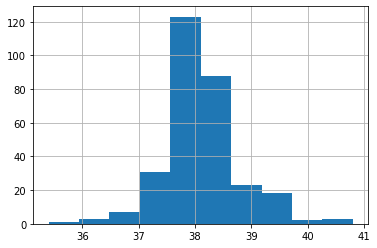

In [18]:
detail['rectal_temp'].hist()

<AxesSubplot:>

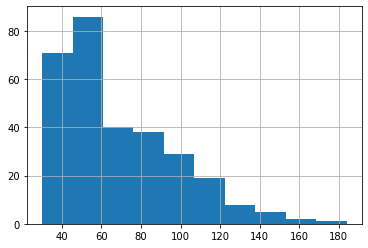

In [19]:
detail['pulse'].hist()

<AxesSubplot:>

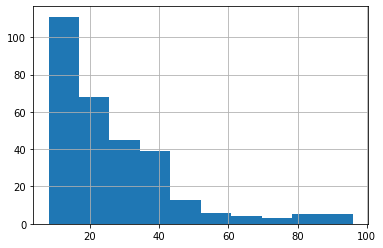

In [20]:
detail['respiratory_rate'].hist(bins=10)

Распределения изменились, но остались похожими на нормальные. 